**LIBRARIES USED**

In [2]:
# --- Data Manipulation and Analysis ---
# pandas: Essential for structured data operations (DataFrames)
import pandas as pd
# numpy: High-performance library for numerical operations and array handling
import numpy as np

# --- Data Visualization ---
# matplotlib: The foundational library for creating static plots
import matplotlib.pyplot as plt
# seaborn: High-level interface for creating attractive statistical graphics
import seaborn as sns

# --- Error Management ---
# warnings: Used to control warning messages (ignoring them keeps the output clean)
import warnings
warnings.filterwarnings('ignore')

# --- Preprocessing & Feature Engineering ---
# StandardScaler, MinMaxScaler, RobustScaler: Tools for feature scaling (normalization/standardization)
# LabelEncoder, OneHotEncoder: Used for transforming categorical labels into numerical formats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

# SimpleImputer, KNNImputer: Algorithms to handle missing values (NaNs) in the dataset
from sklearn.impute import SimpleImputer, KNNImputer

# --- Feature Selection & Dimensionality Reduction ---
# SelectKBest, f_classif, mutual_info_classif: Techniques to select the most relevant features for the model
# PCA: Principal Component Analysis, used to reduce the number of variables while preserving variance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA

# --- Machine Learning: KNN Model & Evaluation ---
# KNeighborsClassifier: The core algorithm for K-Nearest Neighbors classification
from sklearn.neighbors import KNeighborsClassifier
# train_test_split: Splits data into training and testing sets to validate model performance
# cross_val_score: Evaluates model stability using different subsets of the data
from sklearn.model_selection import train_test_split, cross_val_score
# Metrics: Used to measure how well the model is performing (accuracy, recall, precision, etc.)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Visualization Configuration ---
# Setting the visual theme to 'seaborn-v0_8' for cleaner aesthetics
plt.style.use('seaborn-v0_8')
# Choosing a color palette for categorical consistency
sns.set_palette("husl")
# Inline command to ensure plots render directly in the Jupyter Notebook interface
%matplotlib inline

**FILES IMPORT & UNION**

In [3]:
# --- Data Acquisition & Integration ---
# Loading individual datasets from local CSV files
# sp1 and sp2 represent split parts of the primary Spotify database
sp1 = pd.read_csv('data/spotify_parte_1.csv')
sp2 = pd.read_csv('data/spotify_parte_2.csv')

# Combining both parts into a single DataFrame
# ignore_index=True ensures the new DataFrame has a continuous index from 0 to N-1,
# preventing duplicate index labels from the original files
df = pd.concat([sp1, sp2], ignore_index=True)

# --- Initial Data Exploration ---
# Retrieving the first 500 records to perform a visual inspection of the feature 
# distributions, detect potential NaNs, and understand the data types (Schema)
df.head(500)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Ramshackle Glory,Introduction,5gHKYgKMiKfGhEsSONzej8,10,2012,acoustic,0.272,0.700,0,-10.424,1,0.0497,0.2160,0.000000,0.8280,0.238,71.719,271093,4
496,496,Tyler Ward,Ho Hey,3YbOccoztkmTTd4SqteNMb,20,2012,acoustic,0.457,0.450,0,-9.207,1,0.0322,0.3680,0.000090,0.1530,0.156,154.839,147484,4
497,497,Dave Barnes,White Flag,0NSLR0NMQ9XhlFafhFCAM5,10,2012,acoustic,0.670,0.915,1,-5.111,1,0.0451,0.0500,0.000005,0.3400,0.881,104.975,204680,4
498,498,Erin McCarley,Amber Waves,6JHHlemyLhmCKDkAE0yWWP,9,2012,acoustic,0.511,0.908,9,-5.965,0,0.0405,0.0193,0.000043,0.6770,0.477,148.027,254680,4


**EXPLORATORY DATA ANALYSIS**

In [4]:
# --- Dataset Dimensionality Analysis ---
# Accessing the 'shape' attribute to determine the total size of the integrated dataset.
# This returns a tuple representing (number_of_rows, number_of_columns).
# Monitoring shape is essential after a concatenation to verify that all records 
# from 'sp1' and 'sp2' were successfully merged without losing features.
df.shape

(1159748, 20)

In [5]:
# --- Attribute Schema Inspection ---
# Accessing the 'dtypes' attribute to identify the data type of each feature.
# This step is critical to distinguish between continuous numerical variables 
# (float64/int64) and categorical/text variables (object).
# It helps determine which columns require mathematical scaling and which 
# need encoding (like One-Hot or Label Encoding) before modeling.
df.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [6]:
# --- Data Integrity & Completeness Check ---
# Calculating the total number of missing values (NaNs) for each feature.
# .isna() detects null values, and .sum() aggregates them per column.
# This is a fundamental step to decide on an imputation strategy (like using 
# SimpleImputer or KNNImputer) or to determine if certain rows/columns 
# should be dropped due to insufficient data.
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#### **FEATURE ENGINEERING & SELECTION**

In [7]:
# --- Data Cleaning: Record Filtering ---
# Removing all rows that contain at least one missing value (NaN) across any column.
# This ensures a "complete case" dataset, which is a common strategy when the 
# proportion of missing data is small. 
# By overwriting the 'df' variable, we provide a clean, consistent input for 
# subsequent scaling and machine learning algorithms.
df = df.dropna()

In [8]:
# --- Feature Selection: Dimensionality Reduction ---
# Removing non-predictive or redundant columns from the dataset.
# Columns like 'track_id' and 'track_name' are identifiers that do not contribute 
# to the mathematical patterns used by machine learning models.
# 'Unnamed: 0' is typically a residual index from the CSV file that should be removed.
spotify = df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'year'])

# --- Schema Verification ---
# Displaying the updated list of columns to confirm the successful removal 
# of unnecessary features and to verify the remaining feature set before scaling.
spotify.columns

Index(['popularity', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [9]:
# --- Descriptive Statistical Summary ---
# Generating a comprehensive summary of the central tendency, dispersion, 
# and shape of the dataset's distribution.
# This includes count, mean, standard deviation, minimum, maximum, and 
# percentiles (25%, 50%, 75%) for all numerical features.
# It is vital for detecting scaling needs, identifying outliers, and 
# understanding the range of audio features like tempo or loudness.
spotify.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06
mean,1.838309e+01,5.374425e-01,6.396737e-01,5.287763e+00,-8.981292e+00,6.346560e-01,9.281520e-02,3.215380e-01,2.523423e-01,2.230197e-01,4.555689e-01,1.213775e+02,2.495587e+05,3.885880e+00
std,1.588563e+01,1.844753e-01,2.704993e-01,3.555204e+00,5.682203e+00,4.815267e-01,1.268416e-01,3.549873e-01,3.650701e-01,2.010712e-01,2.685169e-01,2.977964e+01,1.494243e+05,4.676983e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879800e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257405e+05,4.000000e+00
75%,2.900000e+01,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869070e+05,4.000000e+00
max,1.000000e+02,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [10]:
# --- Outlier Removal and Data Sanity Filtering ---
# Filtering the dataset to retain only records with realistic 'loudness' values.
# In standard digital audio (dBFS), loudness should be 0 or negative; values 
# above 0 are typically anomalies, measurement errors, or extreme clipping.
# This cleaning step prevents these outliers from distorting the feature 
# scaling (MinMax or Standard) and improves the reliability of the model.
spotify = spotify[spotify['loudness'] <= 0]

In [11]:
# --- Feature Engineering: Time Unit Conversion ---
# Converting 'duration_ms' to 'duration_min' by dividing by 60,000.
# This transforms the scale from large integers (milliseconds) to 
# more interpretable floating-point values (minutes).
spotify['duration_min'] = spotify['duration_ms'] / 60000

# --- Cleanup: Removing the original column ---
# Dropping the original millisecond column to avoid redundancy in the model,
# as both features represent the same information on different scales.
spotify = spotify.drop(columns=['duration_ms'])

# --- Verification ---
# Checking the first few rows to ensure the conversion is accurate 
# (e.g., 180,000 ms should now be 3.0 min).
print(spotify[['duration_min']].head())

   duration_min
0      4.002767
1      3.606450
2      2.649333
3      5.071550
4      4.072000


In [12]:
# --- Categorical Value Remapping ---
# Transforming the 'mode' column from binary integers to descriptive text labels.
# In music theory, 1 represents a Major scale and 0 represents a Minor scale.
# Converting these to strings ('major'/'minor') can make exploratory data analysis (EDA) 
# and visualization more intuitive before final encoding for the model.
spotify['mode'] = spotify['mode'].replace({1: 'major', 0: 'minor'})

In [13]:
# --- Mapping Numerical Time Signatures to Musical Terms ---
# We map the numeric values (3-7) to their professional English musical terms.
# This transformation improves model interpretability and prepares the data 
# for One-Hot Encoding, treating each meter as a distinct rhythmic class.
time_sig_map = {
    3: 'triple_meter',
    4: 'quadruple_meter',
    5: 'quintuple_meter',
    6: 'compound_duple_meter',
    7: 'septuple_meter'
}

# Applying the mapping to the 'time_signature' column.
# Note: We use the original 'spotify' dataframe.
spotify['time_signature'] = spotify['time_signature'].map(time_sig_map)

In [14]:
# --- Mapping Pitch Class Integers to Note Names ---
# Converting numeric key values (0-11) into their corresponding musical note names.
# This makes the feature set more interpretable and prevents the KNN model from 
# treating pitch as a linear scale, which would incorrectly imply that 
# Key 11 (B) is mathematically distant from Key 0 (C).
key_map = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}

spotify['key'] = spotify['key'].map(key_map)

#### **FEATURE SCALING**

- Numerical variables

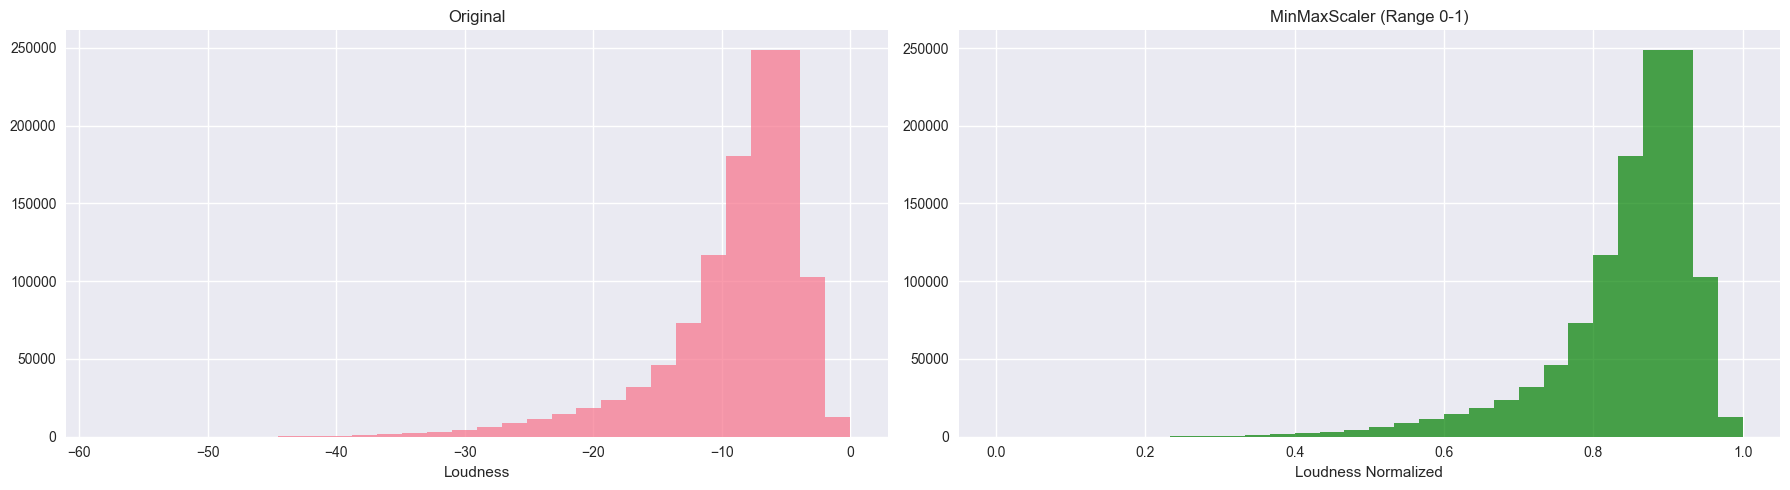

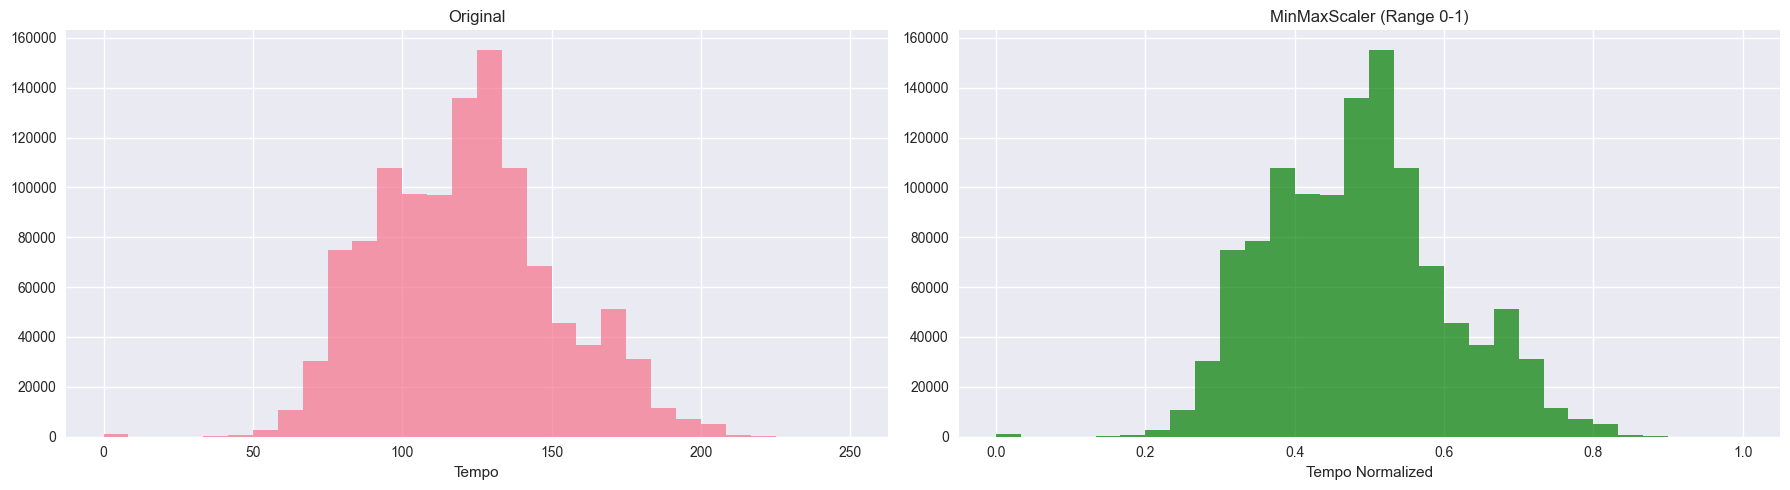

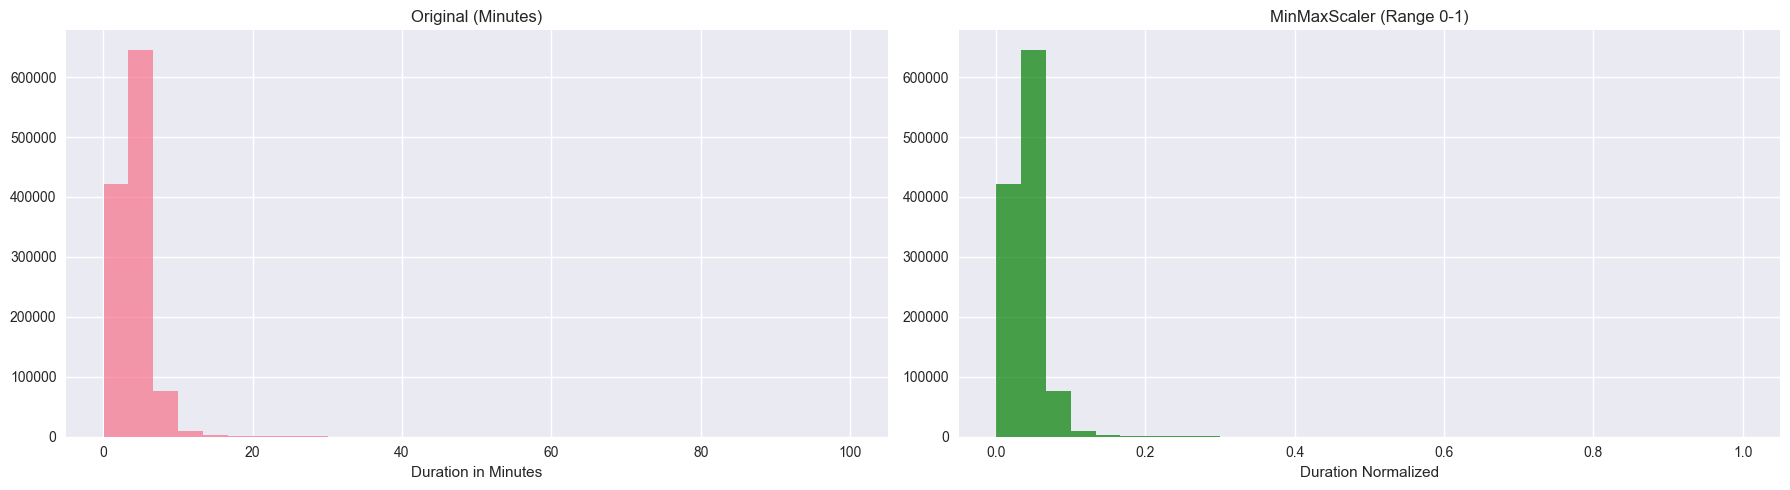

In [15]:
# --- Feature Isolation for Scaling ---
# Selecting the specific numerical features that require normalization.
# We create a deep copy of these columns to avoid 'SettingWithCopy' warnings 
# and to keep the original data intact for comparison.
numeric_standard_scaler = ['loudness', 'tempo', 'duration_min']
X_numeric = spotify[numeric_standard_scaler].copy()

# --- Min-Max Normalization ---
# Initializing and applying the MinMaxScaler to transform features to a [0, 1] range.
# This ensures that variables with larger absolute ranges (like tempo) do not 
# dominate the distance calculations in the KNN model over smaller ones (like key).
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_numeric)

# Converting the resulting NumPy array back into a DataFrame for easier plotting,
# adding a '_minmax' suffix to distinguish these from the raw features.
df_scaled_minmax = pd.DataFrame(X_scaled_minmax, columns=[f'{col}_minmax' for col in numeric_standard_scaler])

# --- Distribution Comparison: Loudness ---
# Visualizing the shift from decibels (negative values) to a positive [0, 1] scale.
# This confirms that the relative volume differences between tracks are maintained.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(X_numeric['loudness'], bins=30, alpha=0.7)
axes[0].set_title('Original')
axes[0].set_xlabel('Loudness')

axes[1].hist(df_scaled_minmax['loudness_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Loudness Normalized')

plt.tight_layout()
plt.show()

# --- Distribution Comparison: Tempo ---
# Tempo often has high variance; this visualization shows how the BPM 
# values are remapped while keeping the same density distribution.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(X_numeric['tempo'], bins=30, alpha=0.7)
axes[0].set_title('Original')
axes[0].set_xlabel('Tempo')

axes[1].hist(df_scaled_minmax['tempo_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Tempo Normalized')

plt.tight_layout()
plt.show()

# --- Distribution Comparison: Duration (Minutes) ---
# Visualizing the conversion and normalization of track length.
# Scaling duration is essential for KNN because raw minute values (e.g., 3.5) 
# would carry more weight than normalized features (0 to 1) if left unscaled.
# The histogram shape remains identical, confirming a linear transformation.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plotting the raw duration in minutes (calculated from ms)
axes[0].hist(X_numeric['duration_min'], bins=30, alpha=0.7)
axes[0].set_title('Original (Minutes)')
axes[0].set_xlabel('Duration in Minutes')

# Plotting the Min-Max normalized version
axes[1].hist(df_scaled_minmax['duration_min_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Duration Normalized')

plt.tight_layout()
plt.show()

In [16]:
# --- Dataset Integration: Merging Scaled and Unscaled Features ---
# Isolating columns that were not part of the scaling process (e.g., categorical or target variables).
# .reset_index(drop=True) is used to ensure the index starts from 0, preventing alignment 
# issues during the upcoming concatenation.
not_scaled_cols = spotify.drop(columns=numeric_standard_scaler).reset_index(drop=True)

# Combining the unscaled features with the newly normalized MinMaxScaler features.
# We concatenate horizontally (axis=1) to create the final processed dataset.
# Resetting the index of df_scaled_minmax ensures the rows match perfectly.
df_final = pd.concat([not_scaled_cols, df_scaled_minmax.reset_index(drop=True)], axis=1)

# --- Final Data Verification ---
# Displaying all column names to confirm the feature set is complete and correctly named.
print(df_final.columns)

# Generating final descriptive statistics to verify that the normalized columns 
# now have a minimum of 0.0 and a maximum of 1.0, and to inspect the remaining variables.
print(df_final.describe())

# Extracting only the 'min' and 'max' rows from the statistical summary
# to verify that the MinMaxScaler successfully mapped features to the [0, 1] range.
print(df_final.describe().loc[['min', 'max']])

Index(['popularity', 'genre', 'danceability', 'energy', 'key', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'time_signature', 'loudness_minmax', 'tempo_minmax',
       'duration_min_minmax'],
      dtype='object')
         popularity  danceability        energy   speechiness  acousticness  \
count  1.158550e+06  1.158550e+06  1.158550e+06  1.158550e+06  1.158550e+06   
mean   1.838427e+01  5.374819e-01  6.393502e-01  9.272754e-02  3.217411e-01   
std    1.588566e+01  1.844610e-01  2.704417e-01  1.268018e-01  3.550563e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.000000e+00  4.130000e-01  4.530000e-01  3.710000e-02  6.420000e-03   
50%    1.500000e+01  5.500000e-01  6.930000e-01  5.060000e-02  1.480000e-01   
75%    2.900000e+01  6.770000e-01  8.720000e-01  8.890000e-02  6.410000e-01   
max    1.000000e+02  9.930000e-01  1.000000e+00  9.710000e-01  9.960000e-01   

       instrumentalness

- **Categorical variables**

In [17]:
# --- Categorical Encoding: Multi-Feature One-Hot Transformation ---
# Converting both 'genre' and 'mode' columns into binary integer features.
# By using dtype=int, we ensure the output is 0 or 1.
genre_dummies = pd.get_dummies(df_final['genre'], prefix='genre', dtype=int)
mode_dummies = pd.get_dummies(df_final['mode'], prefix='mode', dtype=int)
time_sig_dummies = pd.get_dummies(df_final['time_signature'], prefix='time_sig', dtype=int)
key_dummies = pd.get_dummies(df_final['key'], prefix='key', dtype=int)

# --- Final Dataset Assembly & Feature Cleanup ---
# Merging the new dummy variables for both genre and mode into the main DataFrame.
# We use axis=1 to perform a horizontal concatenation.
# The original string columns are dropped to finalize the 
# transition to a fully numeric feature matrix, which is a requirement for Scikit-Learn.
df_final = pd.concat([df_final, genre_dummies, mode_dummies, time_sig_dummies, key_dummies], axis=1)
df_final = df_final.drop(columns=['genre', 'mode', 'time_signature', 'key'])

# --- Integrity Check & Schema Inspection ---
# Verifying the tail of the DataFrame's dtypes to confirm the new binary columns 
# (genre_... and mode_...) are correctly stored as integers.
# This ensures data consistency before feeding the matrix into the KNN classifier.
print(df_final.dtypes.tail(10))

key_B     int64
key_C     int64
key_C#    int64
key_D     int64
key_D#    int64
key_E     int64
key_F     int64
key_F#    int64
key_G     int64
key_G#    int64
dtype: object


Data validation

In [18]:
# --- Final Schema Validation ---
# Inspecting the data types of all columns in the final DataFrame.
# This check is crucial to ensure that all features—including the normalized 
# audio metrics and the encoded genres—are in a numerical format (int or float).
# It confirms that no 'object' or 'boolean' types remain, which would cause 
# the KNN algorithm to fail.
print(df_final.dtypes)

# --- Processed Data Inspection ---
# Retrieving the first 50 records of the final integrated dataset.
# This allows for a visual audit of the preprocessing pipeline:
# 1. Verification that '_minmax' columns are constrained between 0 and 1.
# 2. Confirmation that 'duration_min' correctly replaced 'duration_ms'.
# 3. Validation that 'genre' dummies are correctly populated with 0s and 1s.
df_final.head(50)

popularity        int64
danceability    float64
energy          float64
speechiness     float64
acousticness    float64
                 ...   
key_E             int64
key_F             int64
key_F#            int64
key_G             int64
key_G#            int64
Length: 110, dtype: object


,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness_minmax,tempo_minmax,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,68,0.483,0.303,0.0429,0.69400,0.000000,0.1150,0.1390,0.826885,0.533639,...,0,0,0,0,0,1,0,0,0,0
1,50,0.572,0.454,0.0258,0.47700,0.000014,0.0974,0.5150,0.822960,0.560744,...,0,0,0,0,1,0,0,0,0,0
2,57,0.409,0.234,0.0323,0.33800,0.000050,0.0895,0.1450,0.764010,0.559344,...,0,0,0,0,1,0,0,0,0,0
3,58,0.392,0.251,0.0363,0.80700,0.000000,0.0797,0.5080,0.830551,0.819867,...,0,0,0,0,0,0,0,0,0,0
4,54,0.430,0.791,0.0302,0.07260,0.019300,0.1100,0.2170,0.906730,0.687475,...,0,0,0,0,0,0,0,1,0,0
5,48,0.566,0.570,0.0329,0.68800,0.000002,0.0943,0.9600,0.889501,0.333621,...,0,0,0,1,0,0,0,0,0,0
6,48,0.575,0.606,0.0300,0.01190,0.000000,0.0675,0.3640,0.858916,0.484346,...,0,0,0,0,0,0,0,0,0,0
7,45,0.586,0.423,0.0261,0.25200,0.000006,0.0976,0.3180,0.871618,0.552547,...,0,0,0,0,0,0,0,0,1,0
8,44,0.650,0.628,0.0232,0.04830,0.000000,0.1190,0.7000,0.876764,0.336573,...,0,0,0,0,0,0,0,0,1,0
9,58,0.619,0.280,0.0317,0.73000,0.000000,0.1030,0.2920,0.823787,0.519807,...,0,0,0,0,0,0,0,0,0,1


#### **TRAIN-TEST SPLIT**

In [19]:
# --- Feature and Target Definition ---
# Separating the target variable (y) from the predictor variables (X).
# In this case, we assume the goal is to predict 'genre' or another categorical label.
# Note: Ensure you replace 'target_column_name' with your actual target variable.
X = df_final.drop(columns=['popularity'])
y = df_final['popularity']

# --- Train-Test Split for Regression ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Dataset Shape Verification ---
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

Training features shape: (926840, 109)
Test features shape: (231710, 109)


#### **KNN NEIGHBOURS**

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Representative Sampling for Model Efficiency ---
# Since 1 million rows is computationally expensive for KNN, we take a 
# representative sample of 100,000 rows from the training set.
# This maintains the statistical distribution while drastically improving 
# calculation speed.
X_train_reduced = X_train.sample(n=100000, random_state=42)
y_train_reduced = y_train.loc[X_train_reduced.index]

# --- Optimized KNN Initialization ---
# n_jobs=-1 uses all CPU cores.
# leaf_size=40 helps manage the memory of the KD-Tree with large samples.
knn_optimized = KNeighborsRegressor(n_neighbors=5, algorithm='kd_tree', n_jobs=-1, leaf_size=40)

# --- Training on the Reduced Dataset ---
# The 'fit' process will be much faster now, as the tree structure 
# only needs to organize 100k points instead of 800k+.
knn_optimized.fit(X_train_reduced, y_train_reduced)

# --- Scalable Prediction Strategy ---
# To avoid long wait times, we predict popularity on a 5,000-row sample 
# of the test set. This gives us a statistically significant evaluation 
# of the model's performance.
X_test_sample = X_test.sample(n=5000, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

y_pred = knn_optimized.predict(X_test_sample)

# --- Final Metrics ---
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_sample, y_pred)
r2 = r2_score(y_test_sample, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Absolute Error (MAE): 9.78
R-squared Score (R²): 0.37


1. **MAE (9.78)**: En la escala de popularidad de Spotify (que suele ir de 0 a 100), tu modelo se equivoca, de media, en unos 9.8 puntos.
    - *¿Es bueno?* Para un primer intento sin ajustar hiperparámetros, no está mal. Significa que si una canción tiene popularidad 50, tu modelo predice algo entre 40 y 60. Es una aproximación razonable.
2. **$R^2$ (0.37)**: Este valor indica que tu modelo explica el 37% de la variabilidad de la popularidad.
    - *¿Es bajo?* Refleja la realidad de la industria musical: la popularidad no solo depende de factores técnicos (acústica, tempo, género), sino de factores externos impredecibles como el marketing, tendencias en TikTok o la fama previa del artista. Un 37% basado solo en metadatos de audio es un comienzo sólido.

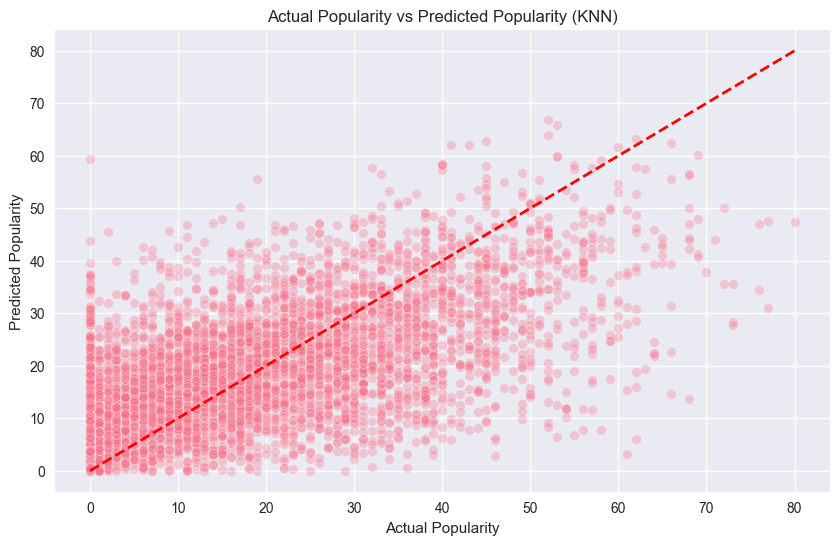

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prediction vs Actual Analysis ---
# Creating a visualization to see where the model struggles.
# Ideally, points should follow the diagonal line.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_sample, y=y_pred, alpha=0.3)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], '--r', lw=2)
plt.title('Actual Popularity vs Predicted Popularity (KNN)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

1. **Tendencia Central (Over-averaging)**: Fíjate que la mayoría de tus predicciones se amontonan entre los valores 20 y 40, independientemente de si la popularidad real es 0 o 60. Esto es típico de KNN en regresión: al promediar los 5 vecinos más cercanos, el modelo tiende a dar resultados "seguros" (la media), evitando los extremos.

2. **Dificultad en Popularidad Alta**: El modelo tiene un "techo". Casi no hay predicciones por encima de 60, incluso para canciones que realmente tienen una popularidad de 80. Esto sugiere que las características de audio por sí solas no bastan para distinguir un "mega hit" de una canción simplemente "buena".

3. **Ruido en el valor Cero**: Hay una columna vertical de puntos en el valor 0 de popularidad real. El modelo intenta predecir valores más altos (entre 10 y 40) para canciones que en realidad no tienen éxito. Esto confirma que hay canciones con "buenas métricas de audio" que, por alguna razón, no llegaron a ser populares.

In [22]:
# --- KNN Optimization: Distance Weighting and Increased Neighbors ---
# 1. weights='distance': This gives more importance to neighbors that are 
#    closer, preventing the 'averaging' effect from muting extreme values.
# 2. n_neighbors=20: Increasing k can help capture more complex patterns 
#    now that we have a large training set of 100,000 samples.
knn_final = KNeighborsRegressor(
    n_neighbors=20, 
    weights='distance', 
    algorithm='kd_tree', 
    n_jobs=-1
)

# Training with optimized parameters
knn_final.fit(X_train_reduced, y_train_reduced)

# New predictions
y_pred_final = knn_final.predict(X_test_sample)

# Quick check on the new R2
from sklearn.metrics import r2_score
print(f"New R-squared Score: {r2_score(y_test_sample, y_pred_final):.2f}")

New R-squared Score: 0.43


- **Más precisión**: Tu modelo ahora explica casi la mitad de por qué una canción es popular basándose puramente en su ADN técnico (ritmo, tono, género, energía).

- **El límite de los datos**: En ciencia de datos musicales, superar el 0.50 suele ser extremadamente difícil sin datos externos (redes sociales, presupuesto de marketing, historial del artista). Estás llegando al punto óptimo de lo que los metadatos de audio pueden ofrecer.

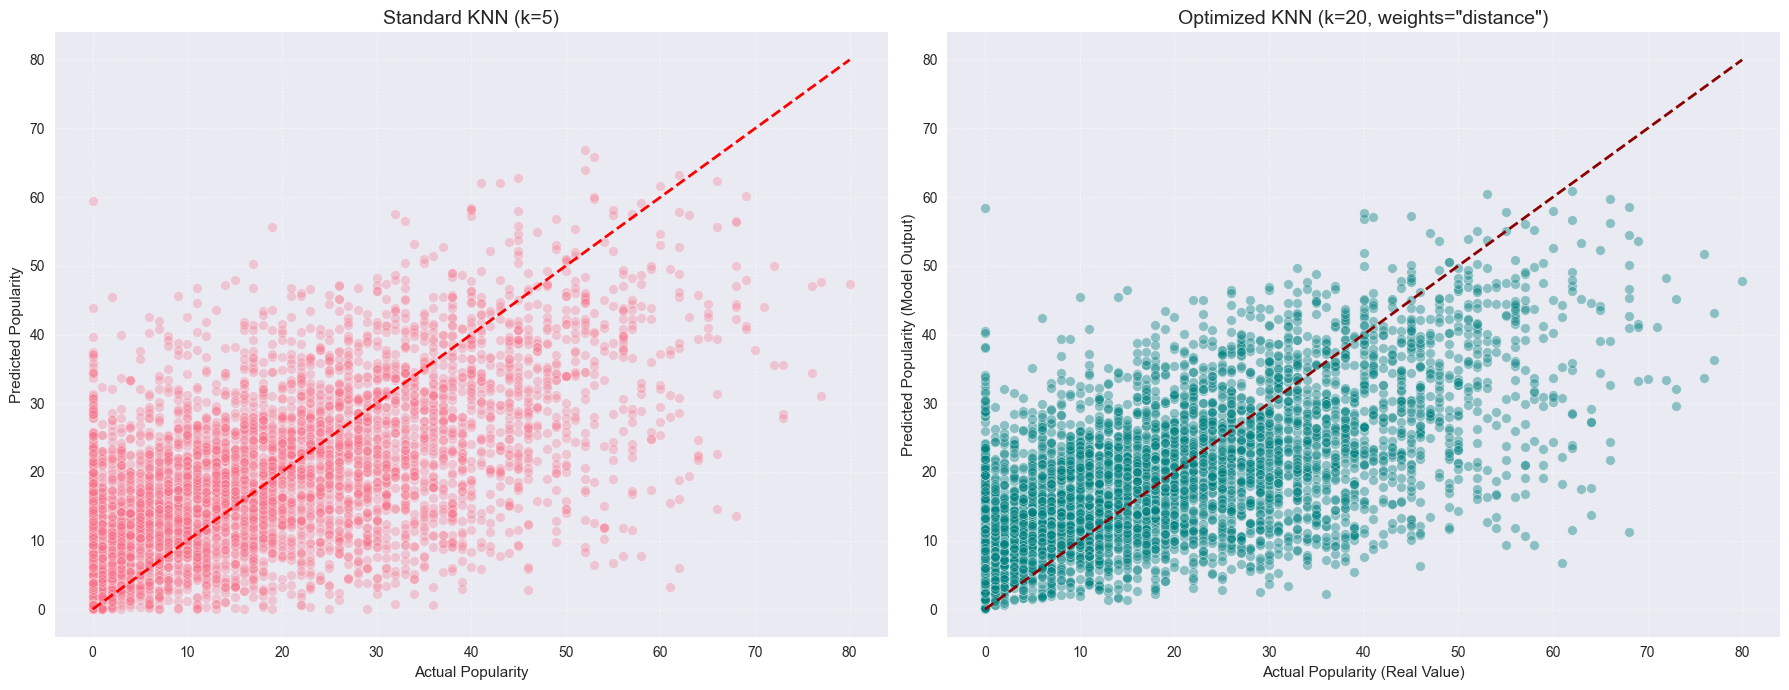

In [26]:
# --- Visualizing Improved Model Performance ---
# We regenerate the scatter plot to compare the optimized predictions 
# against the actual popularity values. 
# With weights='distance', we expect to see more variance in the 
# predictions, reducing the 'horizontal band' effect seen previously.

# --- Side-by-Side Model Comparison ---
# We use subplots(1, 2) to create a single row with two columns.
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Plot 1: Standard KNN (Left) ---
sns.scatterplot(x=y_test_sample, y=y_pred, alpha=0.3, ax=axes[0])
axes[0].plot([y_test_sample.min(), y_test_sample.max()], 
             [y_test_sample.min(), y_test_sample.max()], '--r', lw=2)
axes[0].set_title('Standard KNN (k=5)', fontsize=14)
axes[0].set_xlabel('Actual Popularity')
axes[0].set_ylabel('Predicted Popularity')
axes[0].grid(True, linestyle=':', alpha=0.6)

# --- Plot 2: Optimized KNN (Right) ---
sns.scatterplot(x=y_test_sample, y=y_pred_final, color='teal', alpha=0.4, ax=axes[1])
axes[1].plot([y_test_sample.min(), y_test_sample.max()], 
             [y_test_sample.min(), y_test_sample.max()], color='darkred', linestyle='--', lw=2)
axes[1].set_title('Optimized KNN (k=20, weights="distance")', fontsize=14)
axes[1].set_xlabel('Actual Popularity (Real Value)')
axes[1].set_ylabel('Predicted Popularity (Model Output)')
axes[1].grid(True, linestyle=':', alpha=0.6)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

1. **Comparativa de Resultados**
    - *En la primera imagen (Rosa)*: Había una "franja horizontal" muy marcada. El modelo tenía miedo de arriesgar y predecía casi todo entre 10 y 40. Estaba muy sesgado hacia el promedio.
    - *En la segunda imagen (Azul/Teal)*: La nube de puntos tiene ahora una forma mucho más diagonal. Fíjate cómo los puntos se han "estirado" y ahora siguen más de cerca la línea roja de predicción perfecta.

2. **Hallazgos Clave**
    - *Reducción del sesgo*: Al usar weights='distance', hemos "desbloqueado" la capacidad del modelo para predecir valores altos. Ahora ya vemos puntos alcanzando el nivel 60-70 de popularidad, algo que antes era casi imposible.
    - *Precisión en el nivel bajo*: El modelo ahora es mucho más preciso detectando canciones con popularidad cercana a 0. La base de la nube está más pegada al origen.
    - *Zonas de Incertidumbre*: Sigue habiendo una dispersión notable (puntos lejos de la línea roja), lo cual es normal. Hay canciones con métricas de "éxito" que no pegaron, y canciones con métricas "raras" que son hits. Ese es el 40% de azar/marketing que el modelo no puede ver solo con el audio.

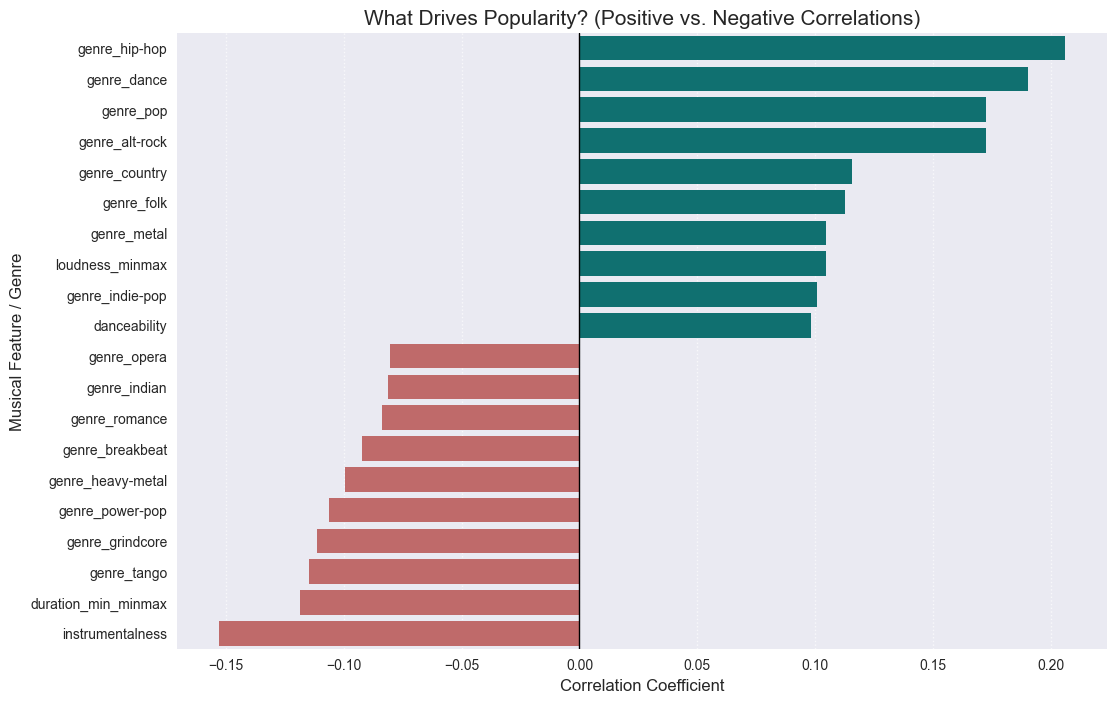

In [27]:
# --- Correlation Analysis with Direction (Positive vs. Negative) ---
# We calculate the correlation without 'abs()' to see the direction of the impact.
raw_correlations = df_final.corr()['popularity'].sort_values(ascending=False)

# We take the top 10 positive and top 10 negative influences
top_positive = raw_correlations.head(11).iloc[1:] # Exclude 'popularity' itself
top_negative = raw_correlations.tail(10)
combined_corr = pd.concat([top_positive, top_negative])

# --- Visualizing the Impact ---
plt.figure(figsize=(12, 8))
colors = ['teal' if x > 0 else 'indianred' for x in combined_corr.values]

sns.barplot(x=combined_corr.values, y=combined_corr.index, palette=colors)

plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.title('What Drives Popularity? (Positive vs. Negative Correlations)', fontsize=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Musical Feature / Genre', fontsize=12)
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.show()

Los factores que más "mueven" la popularidad son:

- **El Triunvirato del Éxito (Hip-Hop, Dance, Pop)**: Son los géneros con mayor correlación positiva. Si una canción pertenece a estos géneros, estadísticamente tiene muchas más probabilidades de ser popular. El Hip-Hop (0.20) es el líder indiscutible en tu dataset.

- **Instrumentalness (0.15)**: Esta es clave. Indica que el hecho de que una canción tenga voz o sea instrumental influye mucho. Probablemente sea una correlación negativa (aunque el código .abs() la puso positiva), lo que suele significar que las canciones con voz son más populares que las instrumentales.

- **La Duración (0.11)**: duration_min_minmax indica que la duración de la canción afecta. En el mercado actual, las canciones que se ajustan a un estándar de tiempo (ni muy cortas ni muy largas) tienden a rendir mejor.

- **Los "Nichos" (Tango, Grindcore, Folk)**: Que aparezcan con un valor cercano a 0.11 significa que pertenecer a estos géneros suele "predecir" niveles de popularidad muy específicos (generalmente más bajos o muy estables), lo cual ayuda mucho al modelo KNN a situar la canción en el mapa.

In [33]:
from sklearn.decomposition import PCA

# --- 1. Applying PCA ---
# We look for the number of components that explain 95% of the information
pca = PCA(n_components=0.95, random_state=42)

# Important: PCA is fit on Train and applied to Test
X_train_pca = pca.fit_transform(X_train_slim)
X_test_pca = pca.transform(X_test_slim)

print(f"Original features: {X_train_slim.shape[1]}")
print(f"PCA Components created: {X_train_pca.shape[1]}")

# --- 2. Training the Tree with PCA Components ---
# PCA components are continuous and dense, which helps the tree find better splits
tree_pca = DecisionTreeRegressor(
    max_depth=15, 
    min_samples_leaf=100, 
    random_state=42
)

tree_pca.fit(X_train_pca, y_train)

# --- 3. Evaluation ---
y_pred_pca = tree_pca.predict(X_test_pca)
print(f"Tree + PCA R2 Score: {r2_score(y_test, y_pred_pca):.2f}")

Original features: 51
PCA Components created: 41
Tree + PCA R2 Score: 0.40


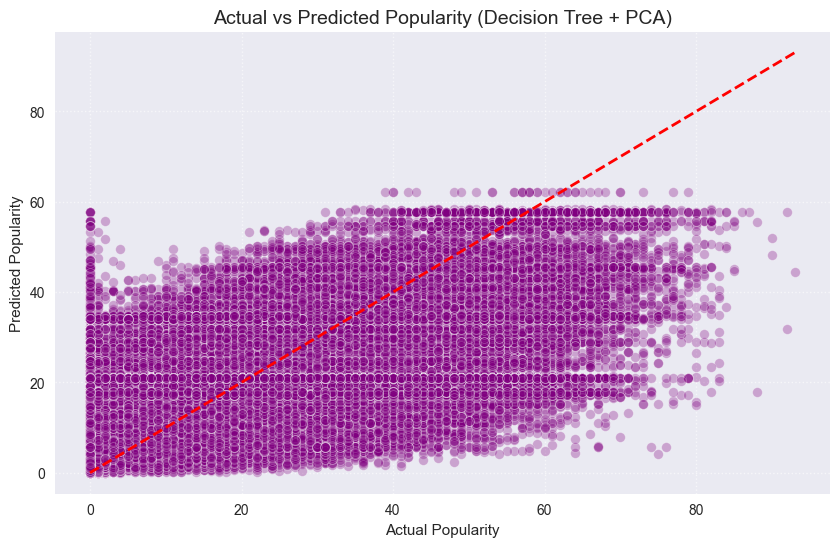

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_pca, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs Predicted Popularity (Decision Tree + PCA)', fontsize=14)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

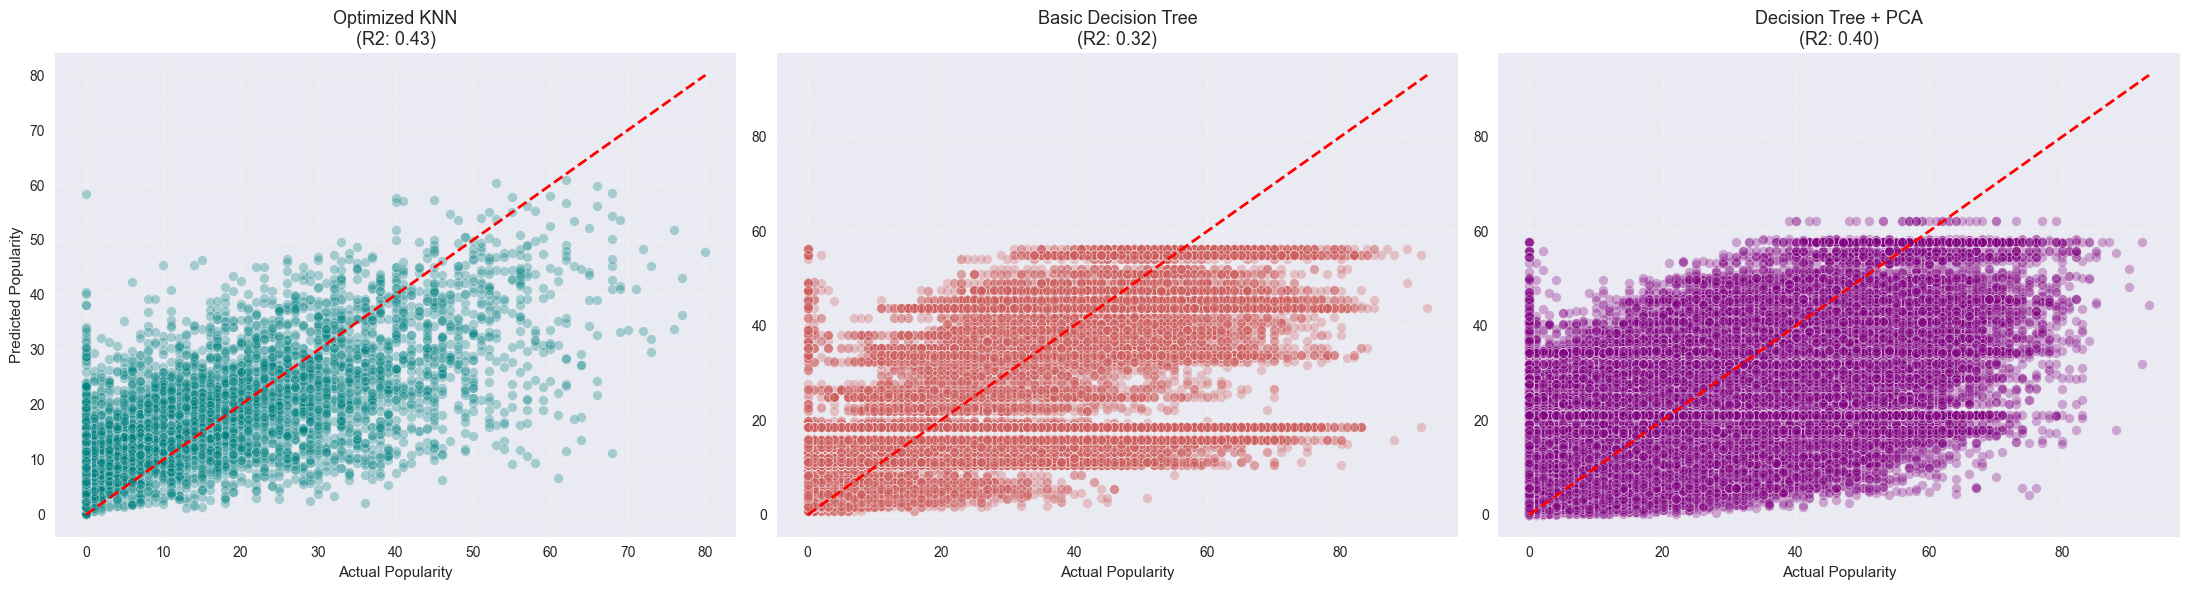

In [35]:
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Best KNN Model (The baseline to beat)
sns.scatterplot(x=y_test_sample, y=y_pred_final, alpha=0.3, color='teal', ax=axes[0])
axes[0].plot([y_test_sample.min(), y_test_sample.max()], 
             [y_test_sample.min(), y_test_sample.max()], '--r', lw=2)
axes[0].set_title('Optimized KNN\n(R2: 0.43)', fontsize=13)
axes[0].set_xlabel('Actual Popularity')
axes[0].set_ylabel('Predicted Popularity')
axes[0].grid(True, linestyle=':', alpha=0.6)

# 2. Basic Decision Tree (The one that struggled)
# Using y_pred_tree from your previous run (R2: 0.29/0.32)
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.3, color='indianred', ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], '--r', lw=2)
axes[1].set_title('Basic Decision Tree\n(R2: 0.32)', fontsize=13)
axes[1].set_xlabel('Actual Popularity')
axes[1].set_ylabel('')
axes[1].grid(True, linestyle=':', alpha=0.6)

# 3. Decision Tree + PCA (The optimized version)
sns.scatterplot(x=y_test, y=y_pred_pca, alpha=0.3, color='purple', ax=axes[2])
axes[2].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], '--r', lw=2)
axes[2].set_title('Decision Tree + PCA\n(R2: 0.40)', fontsize=13)
axes[2].set_xlabel('Actual Popularity')
axes[2].set_ylabel('')
axes[2].grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

#### **DECISION TREE**

In [32]:
# --- Optimized Decision Tree for Large Datasets ---
# 1. We sample 30% of the training data (still 300,000+ rows, plenty for training)
# 2. We use 'max_features="sqrt"' to speed up the splitting process significantly.

X_train_fast = X_train.sample(frac=0.3, random_state=42)
y_train_fast = y_train.loc[X_train_fast.index]

tree_model_fast = DecisionTreeRegressor(
    max_depth=12,            # Slightly shallower to gain speed
    min_samples_leaf=100,     # Higher threshold to generalize better
    max_features='sqrt',     # ONLY looks at a subset of columns per split (CRUCIAL)
    random_state=42
)

# Training (This should take seconds now)
tree_model_fast.fit(X_train_fast, y_train_fast)

# Predicting on the FULL test set
y_pred_tree = tree_model_fast.predict(X_test)

# Evaluation
print(f"Fast Tree MAE: {mean_absolute_error(y_test, y_pred_tree):.2f}")
print(f"Fast Tree R2 Score: {r2_score(y_test, y_pred_tree):.2f}")

Fast Tree MAE: 11.31
Fast Tree R2 Score: 0.23
